# Assessment: Weekly deliverable template - Regression
<font color='#AC135A'>**Applied Machine Learning** - **Sheffield Hallam University**</font>


---

## Introduction
Add your solutions to the different sub-tasks requested for this deliverable.

<font color='red'>DO NOT ADD MORE CELLS TO THE FINAL VERSION OF THIS NOTEBOOK.

### 1. Dataset loading

In [ ]:
import pandas as pd

df = pd.read_csv('wines_SPA.csv')
# I remove all rows with missing values and duplicates. 
# If there weren't a constraint on the number of coding cells, I would first analyse 
# the missing values and duplicates, and how many data they take away from the entire dataset
# in order to decide whether to impute or drop them. 
# Obviously I did this outside of this coding cell when preparing for this task.
# Also, I checked that the resulting distribution don't significantly change after dropping.
# Having done all this work, I would now feel silly to pretend I don't know anything about the dataset.
df = df.dropna()
df = df.drop_duplicates()
print(df.describe())
numerical_columns = df.describe().columns
for column in df.columns:
    if column not in numerical_columns:
        print(f"Unique values in '{column}': {len(df[column].unique())}")

            rating   num_reviews        price         body      acidity
count  1775.000000   1775.000000  1775.000000  1775.000000  1775.000000
mean      4.411887    538.023662   148.786017     4.258592     2.921690
std       0.150982   1352.363601   289.401877     0.652938     0.334181
min       4.200000     25.000000     4.990000     2.000000     1.000000
25%       4.300000     56.000000    33.015000     4.000000     3.000000
50%       4.400000    134.000000    58.260000     4.000000     3.000000
75%       4.500000    499.000000   125.000000     5.000000     3.000000
max       4.900000  32624.000000  3119.080000     5.000000     3.000000
Unique values in 'winery': 425
Unique values in 'wine': 738
Unique values in 'year': 71
Unique values in 'country': 1
Unique values in 'region': 66
Unique values in 'type': 21


**Observations:**  


After cleaning the data from missing values and after removing duplicates, the dataset still has 1,775 examples. 

*NUMERICAL ATTRIBUTES*

*rating*

The rating values have a range between 4.2 and 4.9. Removing the duplicates has dramatically improved the distribution of values. The 75% quartile was at 4.2 (the minimum!), and is now at 4.5. Adding/substracting the std to/from the mean shows that 68% of examples have a rating between 4.3 and 4.6, and 95% of examples have rating below 4.8. From these data I expect a reasonably good distribition at a location of 4.4, the median. For normalisation, a standard approach should do. Rating seems a classic label attribute, as businesses may want to predict customer rating based on a range of criteria, and indirectly (as a proxy label) sales success. 

*num_reviews*

From the name I infer that this is the number of available reviews that lead to the "rating". The range is very high between 25 and 32.624. However, the 25% and 75% quartiles are at 56 and 499, repsectively. This means that 50% of examples have review numbers in this range. The location is skewed to lower values. The standard deviation is quite high though. Only 68% of examples will have review numbers below mean+std = 1890, and 95% are below mean+2*std = 3243. (I'm ignoring the bottom because the minimum value is higher than mean-std.) This suggest we definitely can see some outliers at the top end (32,624). Simply looking at the magnitudes of numbers I am thinking of a logarithmic curve. Possibly a logarithmic normalisation may be a good approach here. 

*price*

We see similar behaviour of the price data: A huge range (4.99–3119.08), a relatively strong 25-75% range (33.015-125) that is located at the lower price range, and again a very high standard deviation that shows that only 68% of examples have a price below 438.19, while 95% have a price below 727.59. The expectation again is to have some outliers at the top end. Again for normalisation, a logarithmic approach may be indicated. As for correlation analysis it may be an interesting question if the price correlates to rating in some way. Also, the expectation is that the number of reviews is higher towards the lower end of the price range. On the other hand, a higher price may correlate with an older year. - I can see price as a target label for producers who have to find the sweet spot for their own product.

*body*

The range for body is between 2.0 and 5.0, and we don't see any decimals. This could mean this body is likely determined as a rating between 1 and 5. the 25% quartile is at 4. This means that the more than 75% of examples has a body value of 4 or 5, i.e. one of two values. This means the informational content of this attribute is questionable.

*acidity*

For acidity the case is even more extrem mean-2*std is at 2.25, so 95% of examples have as value 3 (the maximum value). This attribute we can ignore as there is no informational content. 


*CATEGORICAL ATTRIBUTES*

*winery and wine*

In order to have enough training examples I understand that the number of examples should be at least one magnitude higher than the number of classes. In a dataset of 1,775 that means that any attribute with more than 177 values may not be too helpful as there are simply not enough training data. 
In our dataset, that is true for 'winery' and 'wine'. Hence I will not use these attributes. 

*year*

I know from previous work that the 'year' column has some missing values that are already imputed with 'N.V.'. I could also drop these, but I am careful as maybe there was a reason why no year was given, maybe these are blended wines. 'Year' is also an ordinal category because the expectation is that older wines are more expensive – comparisons are reasonable with 'year', but not addition etc, so 'year' is not a numerical attribute. To get floats, which are required for the vectors, I can directly convert the year to a number. Then I can impute the missing values with the median to give the attribute less weight for these examples. On top of it I can create an additional column 'year_missing' as 0/1. 

*country*

There is only one value in this category, and hence there is no informational content. I am dropping this attribute. 

*region and type*

These attributes have a reasonable number of unique values (66 and 21, respectively). It also seems from my domain knowledge that these attributes may well be relevant for predicting price and/or rating. So I'll keep them. They are still quite numerous for one-hot-encoding, so maybe frequency encoding is the way forward (https://letsdatascience.com/frequency-encoding/).





### 2. At least two exploratory graphs with captions



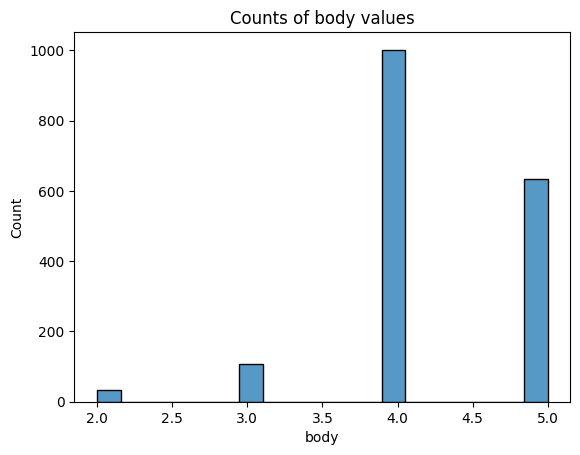

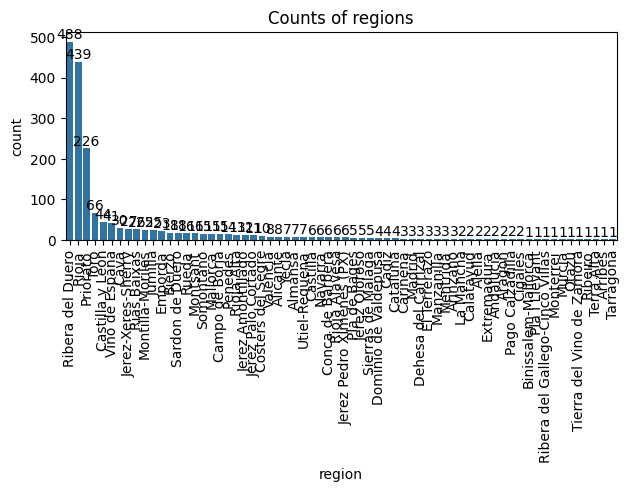

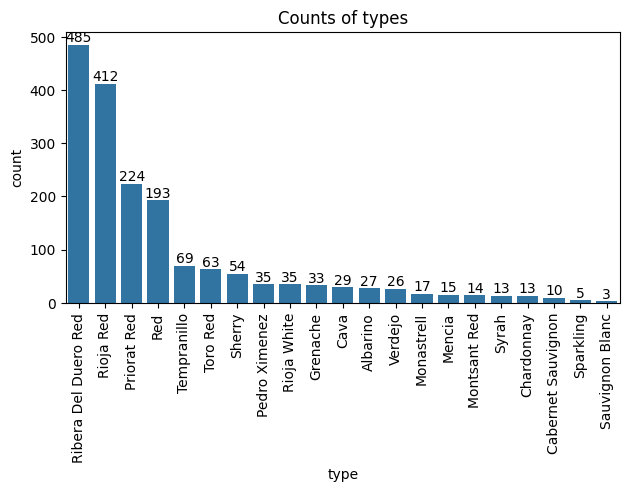

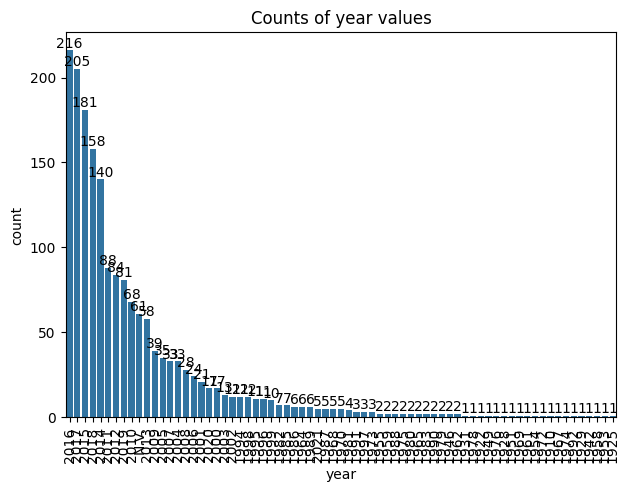

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['body'])
plt.title('Counts of body values')
plt.show()


ax = sns.countplot(
    data=df,
    x='region',
    order=df['region'].value_counts().index  
)
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(count, 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=90)  
plt.tight_layout()
plt.title('Counts of region values')
plt.show()

ax = sns.countplot(
    data=df,
    x='type',
    order=df['type'].value_counts().index  
)
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(count, 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=90)  
plt.tight_layout()
plt.title('Counts of type values')
plt.show()


ax = sns.countplot(
    data=df,
    x='year',
    order=df['year'].value_counts().index  
)
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(count, 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=90)  
plt.tight_layout()
plt.title('Counts of year values')
plt.show()



**Observations:**  

*body*

Even though there are not very many values, I'll keep the attribute for training. Maybe there is some information in this after all. 

*region*

Looking at the distribution I now think  that there are too many classes with too few examples. So I decide to drop this attribute also.

*type*

On the other hand the type distribution looks acceptable to me. So I will keep this attribute in the model. I'm more convinced that frequency enconding is the right way to handle these. 

*year*

As an ordinal category, the year distribution is very unbalanced. However, as it is not a numerical category, it is what it is and I can leave it or normalise it regularly. That said, considering the many years with very low counts, and considering I still have those missing value examples, I could also create 3 buckets with equal counts based on age, such as "old", "middle", "new", and have an additional bucket "missing_age". I feel maybe that's the best way forward. 


### 3. Histogram showing rating imbalance (if any)


In [ ]:
# ---- Your code here ----

**Observations:**  

### 4. Price-regression model + metrics + plot


In [ ]:
# ---- Your code here ----

**Observations:**  

### 5. Quality-regression model + metrics + plot


In [ ]:
# ---- Your code here ----

**Observations:**  

### 6. Over/under-fitting discussion and fix

In [ ]:
# ---- Your code here ----

**Observations:**  

### 7. Apply cross-validation or statistical analyses on the features or results of the regression models (advanced)

In [ ]:
# ---- Your code here ----

**Observations:**  